In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("flatiron_tweets.csv")

In [3]:
df.shape

(7820, 34)

In [4]:
df.head()

id      conversation_id     created_at        date  \
0  1270350526203531264  1270344472908517376  1591710142000  2020-06-09   
1  1270121097506193408  1270041572441276416  1591655442000  2020-06-08   
2  1269992584740470784  1269783107504308224  1591624802000  2020-06-08   
3  1269991700832927745  1269739128800903168  1591624591000  2020-06-08   
4  1269991613801140224  1269763636987334657  1591624570000  2020-06-08   

       time timezone    user_id        username                    name  \
0  09:42:22      EDT  702354494  flatironschool  Flatiron School (at 🏡)   
1  18:30:42      EDT  702354494  flatironschool  Flatiron School (at 🏡)   
2  10:00:02      EDT  702354494  flatironschool  Flatiron School (at 🏡)   
3  09:56:31      EDT  702354494  flatironschool  Flatiron School (at 🏡)   
4  09:56:10      EDT  702354494  flatironschool  Flatiron School (at 🏡)   

   place  ... geo source user_rt_id user_rt  retweet_id  \
0    NaN  ... NaN    NaN        NaN     NaN         NaN   
1    NaN  ... NaN    NaN        NaN     NaN         NaN   
2    NaN  ... NaN    NaN        NaN     NaN         NaN   
3    NaN  ... NaN    NaN        NaN     NaN         NaN   
4    NaN  ... NaN    NaN        NaN     NaN         NaN   

                                            reply_to  retweet_date translate  \
0  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   
1  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   
2  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   
3  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   
4  [{'user_id': '702354494', 'username': 'Flatiro...           NaN       NaN   

  trans_src trans_dest  
0       NaN        NaN  
1       NaN        NaN  
2       NaN        NaN  
3       NaN        NaN  
4       NaN        NaN  

[5 rows x 34 columns]

In [5]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'mentions', 'urls',
       'photos', 'replies_count', 'retweets_count', 'likes_count', 'hashtags',
       'cashtags', 'link', 'retweet', 'quote_url', 'video', 'near', 'geo',
       'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to',
       'retweet_date', 'translate', 'trans_src', 'trans_dest'],
      dtype='object')

In [6]:
keep = ['date','time','user_id','tweet','mentions','replies_count',
        'retweets_count', 'likes_count', 'hashtags']

In [7]:
tweet_df = df.copy()[keep]

In [8]:
tweet_df.head()

date      time    user_id  \
0  2020-06-09  09:42:22  702354494   
1  2020-06-08  18:30:42  702354494   
2  2020-06-08  10:00:02  702354494   
3  2020-06-08  09:56:31  702354494   
4  2020-06-08  09:56:10  702354494   

                                               tweet  \
0  This is such a great post, Richard! Thanks for...   
1                    Happy belated @Kizito79217878 🥳   
2  👏 Little by little, every day! Let us know if ...   
3                                This is beautiful 😍   
4                         🙌 Amazing work, as always.   

                                      mentions  replies_count  retweets_count  \
0                             ['richard_bobo']              0               3   
1  ['kizito79217878', 'aenbar', 'aviflombaum']              1               0   
2                                 ['draggemz']              0               0   
3                            ['brianlinuxing']              0               1   
4                            ['collinjilbert']              0               0   

   likes_count                            hashtags  
0            3  ['#codenewbies', '#100daysofcode']  
1            1                                  []  
2            1                                  []  
3            0                                  []  
4            1                                  []

In [9]:
likes = tweet_df.likes_count.sum()
print (f'Total likes: {likes}')

Total likes: 30396


In [10]:
replies = tweet_df.replies_count.sum()
print (f'Total likes: {replies}')

Total likes: 1984


In [35]:
#make tweets list from string
tweet_df.hashtags = tweet_df.hashtags.apply(lambda x: eval(x))

In [36]:
hash_count = {}
for mention in tweet_df.hashtags:
    if len(mention) !=0 :
        for person in mention:
            hash_count[person] = hash_count.get(person, 0) + 1
    

In [14]:
import spacy

nlp = spacy.load("en_core_web_md")

In [15]:
nlp_df = df.copy()[['date','tweet']]

In [54]:
#regular expression to remove url
import re
def strip_url(tweet):
    try:
        clean_tweet = re.sub(r"pic.\S+", "", tweet)
        return clean_tweet.strip()
    except:
        return tweet.strip()

In [55]:
nlp_df['clean_tweet'] = nlp_df.tweet.apply(lambda x: strip_url(x))

In [56]:
corpus = []

for doc in nlp_df.clean_tweet:
    d = (list(filter(lambda x: x.is_stop==False,nlp(doc))))
    d = (list(filter(lambda x: x.is_punct==False, d)))
    d = (list(filter(lambda x: x.like_url==False, d)))
    d = (list(map(lambda x: x.lemma_, d)))
    corpus.append(d)

In [25]:
word_freq = {}
for doc in corpus:
    for word in doc:
        word_freq[word] = word_freq.get(word,0) + 1

In [37]:
word_counts = pd.DataFrame(word_freq.items())
word_counts.columns = ['word','count']
hash_count = pd.DataFrame(hash_count.items())
hash_count.columns = ['hashtag', 'count']

In [28]:
word_counts.sort_values('count', ascending=False, inplace=True)

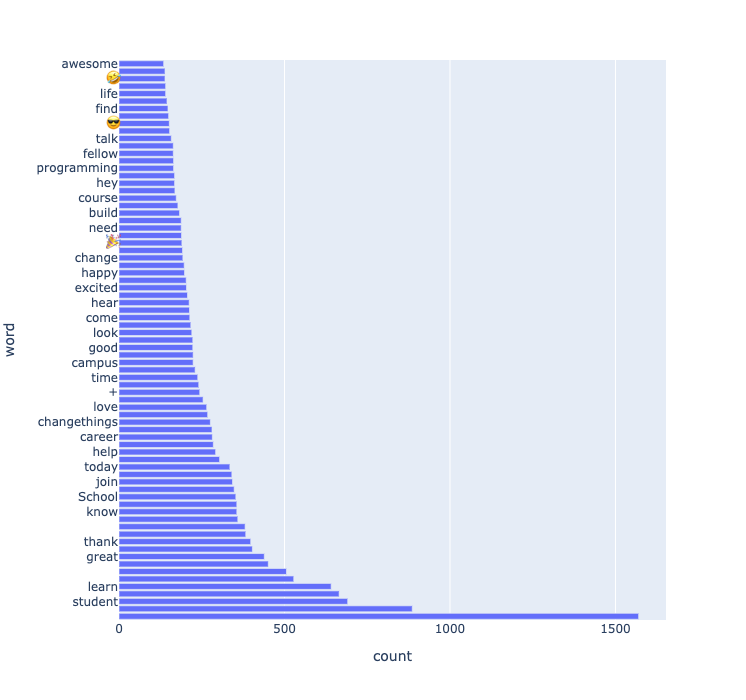

In [29]:
import plotly.express as px

px.bar(word_counts[:75],x='count', y='word', orientation='h'
      ,width=800, height=700)

In [38]:
hash_count.sort_values('count', ascending=False, inplace=True)

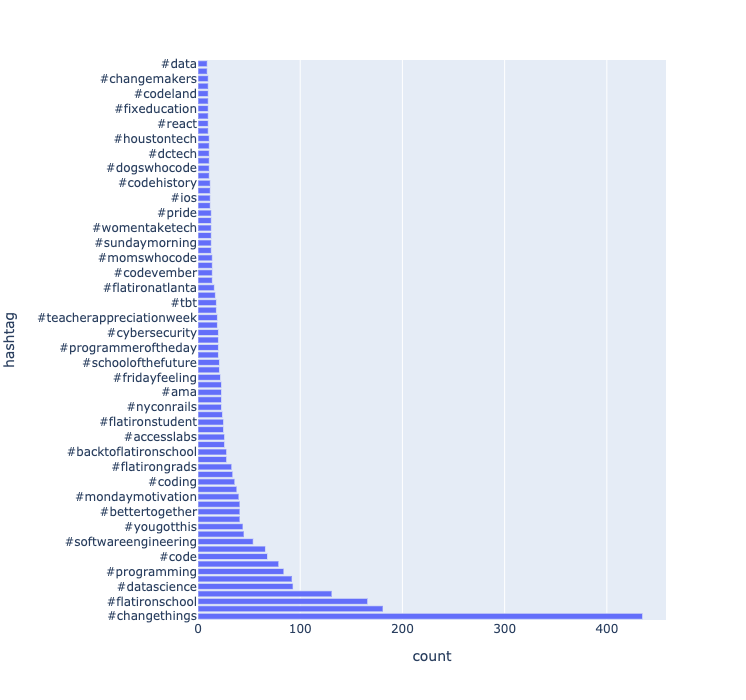

In [40]:
px.bar(hash_count[:75],x='count', y='hashtag', orientation='h'
      ,width=800, height=700)

In [57]:
from wordcloud import WordCloud
corpus_str = list(map(lambda x: (' ').join(x),corpus))

In [60]:
hash_str = (' ').join(list(hash_count.hashtag))

(-0.5, 399.5, 199.5, -0.5)

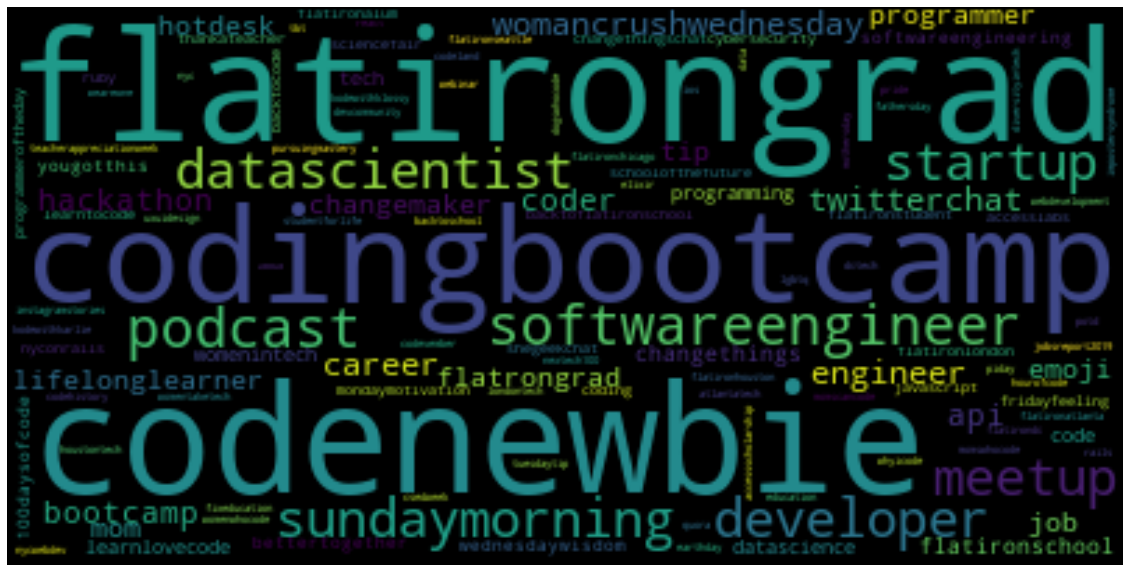

In [61]:
# Generate a word cloud image
wordcloud = WordCloud().generate((' ').join(list(hash_count.hashtag)))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

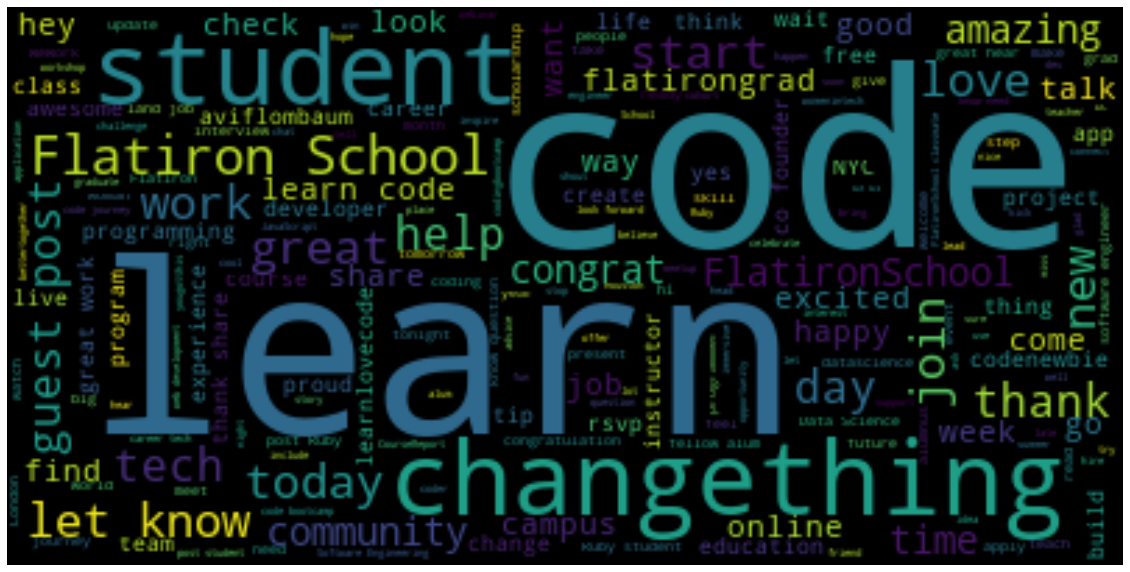

In [58]:
# Generate a word cloud image
wordcloud = WordCloud().generate((' ').join(corpus_str))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")